# Example for kernel machine
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


march 19, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
h = 0.02  # step size in the mesh

names = [
    "Linear SVM",
    "RBF SVM",
]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
]


# Create a linearly separable dataset

## Generate two clusters of points

In [27]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

In [28]:
X.shape

(100, 2)

In [29]:
y.shape

(100,)

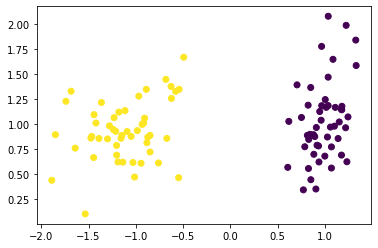

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y)

# we add noise to the points 

In [33]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

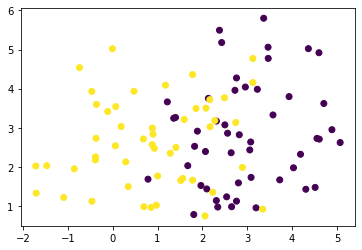

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y)


# Let us create a more complex dataset

In [58]:
dm=make_moons(noise=0.0, random_state=0)

In [59]:
X, y=dm

In [60]:
X.shape

(100, 2)

In [61]:
y.shape

(100,)

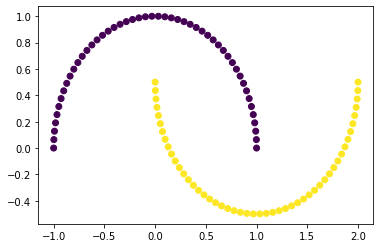

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=y)

## Moon data set with noise

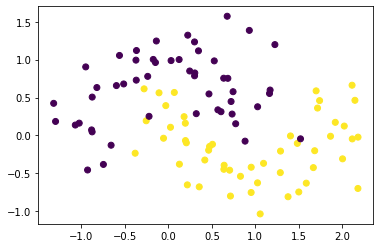

In [64]:
dm=make_moons(noise=0.3, random_state=0)
X, y=dm
plt.scatter(X[:, 0], X[:, 1], c=y)

# Divide into train and test

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )


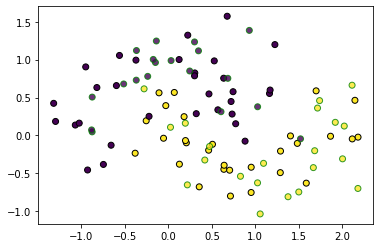

In [97]:
ax = plt.subplot()   
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k")
# Plot the testing points
ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8, edgecolors="g"
    )

# Classifier (linear)

In [98]:
clf=SVC(kernel="linear", C=0.025)
#SVC(gamma=2, C=1),

In [99]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [100]:
print(score)

0.875


## Plot the classified points

In [101]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [102]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

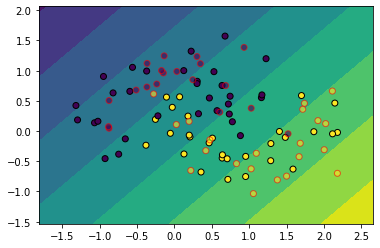

In [103]:
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax = plt.subplot()   
ax.contourf(xx, yy, Z, alpha=1)
# Plot the training points
ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train,  edgecolors="k"
        )
# Plot the testing points
ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            edgecolors="r",
            alpha=0.6,
        )


# Classifier (RBF)

In [106]:
clf=SVC(gamma=2, C=1)

In [107]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [108]:
print(score)

0.975


# Plot the classified points

In [110]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

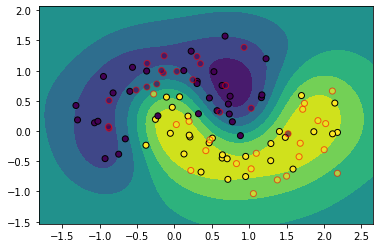

In [111]:
 # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax = plt.subplot()   
ax.contourf(xx, yy, Z, alpha=1)
# Plot the training points
ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train,  edgecolors="k"
        )
# Plot the testing points
ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            edgecolors="r",
            alpha=0.6,
        )
